### MORTALITY RATES ANALYSIS

We have been provided with data on the under-five mortality rate and neonatal mortality rate for the African region, which has been downloaded from the UN Inter-agency Group for Child Mortality Estimation. 

##### Objectives 

1. Filter data for the eight countries belonging to the East African Community.

2. Visualize the latest estimate of each indicator at the country level using shapefiles.

3. Show the average trends in the mortality rates over time (plot the average trend line and add the points in the graphic for the country level estimates for each indicator).

4. Based on the visualizations, identify the countries with the highest under-five mortality rates in East Africa and the highest neonatal mortality.

##### Data Cleaning

In [1]:
#load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import seaborn as sns 
import os

In [2]:
#load data

INR = pd.read_csv('dataset_datascience.csv', encoding='latin1', low_memory=False)

INR

,REF_AREA,Geographic area,Regional group,Indicator,Sex,Wealth Quintile,Series Name,Series Year,Reference Date,Observation Value,...,Country notes,Observation Status,Unit of measure,Series Type,Series Category,Series Method,Age Group of Women,Time Since First Birth,Definition,Interval
0,AFG,Afghanistan,NaN,Neonatal mortality rate,Total,Total,Afghanistan Health Survey 2018 (Direct),2018,1995.5,47.869030,...,NaN,Excluded from IGME,"Deaths per 1,000 live births",Direct,Others,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5.0
1,AFG,Afghanistan,NaN,Neonatal mortality rate,Total,Total,Afghanistan Health Survey 2018 (Direct),2018,2000.5,35.349317,...,NaN,Excluded from IGME,"Deaths per 1,000 live births",Direct,Others,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5.0
2,AFG,Afghanistan,NaN,Neonatal mortality rate,Total,Total,Afghanistan Health Survey 2018 (Direct),2018,2005.5,27.699219,...,NaN,Excluded from IGME,"Deaths per 1,000 live births",Direct,Others,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5.0
3,AFG,Afghanistan,NaN,Neonatal mortality rate,Total,Total,Afghanistan Health Survey 2018 (Direct),2018,2010.5,21.056003,...,NaN,Excluded from IGME,"Deaths per 1,000 live births",Direct,Others,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5.0
4,AFG,Afghanistan,NaN,Neonatal mortality rate,Total,Total,Afghanistan Health Survey 2018 (Direct),2018,2015.5,20.167379,...,NaN,Excluded from IGME,"Deaths per 1,000 live births",Direct,Others,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129559,ZWE,Zimbabwe,NaN,Under-five mortality rate,Total,Total,UN IGME estimate,2023,2019.5,51.062569,...,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,NaN,1.0
129560,ZWE,Zimbabwe,NaN,Under-five mortality rate,Total,Total,UN IGME estimate,2023,2020.5,50.083316,...,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,NaN,1.0
129561,ZWE,Zimbabwe,NaN,Under-five mortality rate,Total,Total,UN IGME estimate,2023,2021.5,47.620611,...,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,NaN,1.0
129562,ZWE,Zimbabwe,NaN,Under-five mortality rate,Total,Total,UN IGME estimate,2023,2022.5,45.985854,...,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [3]:
INR.columns

Index(['REF_AREA', 'Geographic area', 'Regional group', 'Indicator', 'Sex',
       'Wealth Quintile', 'Series Name', 'Series Year', 'Reference Date',
       'Observation Value', 'Lower Bound', 'Upper Bound', 'Standard Error',
       'Country notes', 'Observation Status', 'Unit of measure', 'Series Type',
       'Series Category', 'Series Method', 'Age Group of Women',
       'Time Since First Birth', 'Definition', 'Interval'],
      dtype='object')

##### 1. Filter data for the eight countries belonging to the East African Community.

In [4]:
# Filter for EAC countries 
eac_countries = ["Burundi", "Kenya", "Rwanda", "South Sudan", "Tanzania", "Uganda", "Democratic Republic of the Congo", "Somalia"]
eac_inr_data = INR[INR["Geographic area"].isin(eac_countries)]


In [5]:
eac_inr_data

,REF_AREA,Geographic area,Regional group,Indicator,Sex,Wealth Quintile,Series Name,Series Year,Reference Date,Observation Value,...,Country notes,Observation Status,Unit of measure,Series Type,Series Category,Series Method,Age Group of Women,Time Since First Birth,Definition,Interval
6387,BDI,Burundi,NaN,Neonatal mortality rate,Total,Total,Demographic and Health Survey 2016-2017 (Direct),2016-2017,1993.5,36.413480,...,NaN,Excluded from IGME,"Deaths per 1,000 live births",Direct,DHS,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5.0
6388,BDI,Burundi,NaN,Neonatal mortality rate,Total,Total,Demographic and Health Survey 2016-2017 (Direct),2016-2017,1998.5,41.259960,...,NaN,Included in IGME,"Deaths per 1,000 live births",Direct,DHS,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5.0
6389,BDI,Burundi,NaN,Neonatal mortality rate,Total,Total,Demographic and Health Survey 2016-2017 (Direct),2016-2017,2003.5,32.839150,...,NaN,Included in IGME,"Deaths per 1,000 live births",Direct,DHS,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5.0
6390,BDI,Burundi,NaN,Neonatal mortality rate,Total,Total,Demographic and Health Survey 2016-2017 (Direct),2016-2017,2008.5,28.465570,...,NaN,Included in IGME,"Deaths per 1,000 live births",Direct,DHS,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5.0
6391,BDI,Burundi,NaN,Neonatal mortality rate,Total,Total,Demographic and Health Survey 2016-2017 (Direct),2016-2017,2013.5,23.706230,...,NaN,Included in IGME,"Deaths per 1,000 live births",Direct,DHS,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113635,UGA,Uganda,NaN,Under-five mortality rate,Total,Total,UN IGME estimate,2023,2019.5,45.307572,...,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,NaN,1.0
113636,UGA,Uganda,NaN,Under-five mortality rate,Total,Total,UN IGME estimate,2023,2020.5,43.509117,...,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,NaN,1.0
113637,UGA,Uganda,NaN,Under-five mortality rate,Total,Total,UN IGME estimate,2023,2021.5,41.786456,...,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,NaN,1.0
113638,UGA,Uganda,NaN,Under-five mortality rate,Total,Total,UN IGME estimate,2023,2022.5,40.493282,...,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [6]:
eac_inr_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4861 entries, 6387 to 113639
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   REF_AREA                4861 non-null   object 
 1   Geographic area         4861 non-null   object 
 2   Regional group          0 non-null      object 
 3   Indicator               4861 non-null   object 
 4   Sex                     4861 non-null   object 
 5   Wealth Quintile         4861 non-null   object 
 6   Series Name             4861 non-null   object 
 7   Series Year             4861 non-null   object 
 8   Reference Date          4861 non-null   float64
 9   Observation Value       4861 non-null   float64
 10  Lower Bound             2867 non-null   float64
 11  Upper Bound             2867 non-null   float64
 12  Standard Error          1537 non-null   float64
 13  Country notes           0 non-null      object 
 14  Observation Status      4861 non-null   

I dropped the Regional group, Country notes and Definition columns since it contains null data. 

In [7]:
# Drop Regional group, country notes and definition
columns_to_drop = ['Regional group', 'Country notes','Definition']
eac_inr_data_dropped = eac_inr_data.drop(columns=columns_to_drop, axis=1)
eac_inr_data_dropped

,REF_AREA,Geographic area,Indicator,Sex,Wealth Quintile,Series Name,Series Year,Reference Date,Observation Value,Lower Bound,Upper Bound,Standard Error,Observation Status,Unit of measure,Series Type,Series Category,Series Method,Age Group of Women,Time Since First Birth,Interval
6387,BDI,Burundi,Neonatal mortality rate,Total,Total,Demographic and Health Survey 2016-2017 (Direct),2016-2017,1993.5,36.413480,NaN,NaN,8.279168,Excluded from IGME,"Deaths per 1,000 live births",Direct,DHS,Survey/Census with Full Birth Histories,NaN,NaN,5.0
6388,BDI,Burundi,Neonatal mortality rate,Total,Total,Demographic and Health Survey 2016-2017 (Direct),2016-2017,1998.5,41.259960,NaN,NaN,5.769786,Included in IGME,"Deaths per 1,000 live births",Direct,DHS,Survey/Census with Full Birth Histories,NaN,NaN,5.0
6389,BDI,Burundi,Neonatal mortality rate,Total,Total,Demographic and Health Survey 2016-2017 (Direct),2016-2017,2003.5,32.839150,NaN,NaN,3.870619,Included in IGME,"Deaths per 1,000 live births",Direct,DHS,Survey/Census with Full Birth Histories,NaN,NaN,5.0
6390,BDI,Burundi,Neonatal mortality rate,Total,Total,Demographic and Health Survey 2016-2017 (Direct),2016-2017,2008.5,28.465570,NaN,NaN,4.417056,Included in IGME,"Deaths per 1,000 live births",Direct,DHS,Survey/Census with Full Birth Histories,NaN,NaN,5.0
6391,BDI,Burundi,Neonatal mortality rate,Total,Total,Demographic and Health Survey 2016-2017 (Direct),2016-2017,2013.5,23.706230,NaN,NaN,2.979608,Included in IGME,"Deaths per 1,000 live births",Direct,DHS,Survey/Census with Full Birth Histories,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113635,UGA,Uganda,Under-five mortality rate,Total,Total,UN IGME estimate,2023,2019.5,45.307572,34.384369,59.772060,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0
113636,UGA,Uganda,Under-five mortality rate,Total,Total,UN IGME estimate,2023,2020.5,43.509117,31.686945,59.309435,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0
113637,UGA,Uganda,Under-five mortality rate,Total,Total,UN IGME estimate,2023,2021.5,41.786456,29.176171,59.023163,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0
113638,UGA,Uganda,Under-five mortality rate,Total,Total,UN IGME estimate,2023,2022.5,40.493282,27.342487,59.214030,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0


In [8]:
eac_inr_data_dropped['Geographic area'].value_counts()

Geographic area
Rwanda                              976
Kenya                               972
Uganda                              934
Burundi                             585
Democratic Republic of the Congo    508
South Sudan                         506
Somalia                             380
Name: count, dtype: int64

Looks like we have all the EAC countries, except Tanzania.

##### 2. Visualize the latest estimate of each indicator at the country level using shapefiles

In [9]:
# List of ISO codes for the 8 EAC countries
eac_iso_codes = ['BDI', 'KEN', 'RWA', 'SSD', 'UGA', 'COD', 'SOM']

In [10]:
# Path to the folder with the downloaded shapefiles
folder_path = "eac_shapefiles/"

In [11]:
#Load and merge all shapefiles
gdfs = []
for iso in eac_iso_codes:
    file_path = os.path.join(folder_path, f"gadm41_{iso}_shp.zip")
    gdf = gpd.read_file(f"zip://{file_path}", layer=f"gadm41_{iso}_0")  # explicitly Level 0
    gdfs.append(gdf)


In [12]:
# Combine all into one GeoDataFrame
eac_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

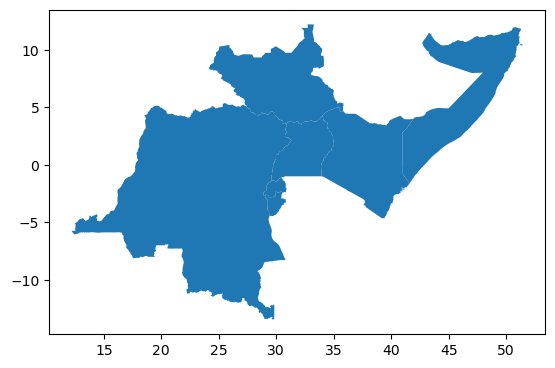

In [13]:
eac_gdf.plot();

In [14]:
eac_gdf

,GID_0,COUNTRY,geometry
0,BDI,Burundi,"POLYGON ((30.04515 -4.25684, 30.04523 -4.2576,..."
1,KEN,Kenya,"MULTIPOLYGON (((39.38014 -4.71792, 39.37986 -4..."
2,RWA,Rwanda,"POLYGON ((29.71332 -2.81759, 29.71295 -2.81774..."
3,SSD,South Sudan,"POLYGON ((29.79568 4.3843, 29.79645 4.38899, 2..."
4,UGA,Uganda,"POLYGON ((29.91125 -1.47687, 29.91099 -1.47613..."
5,COD,Democratic Republic of the Congo,"MULTIPOLYGON (((27.24913 -11.79462, 27.2478 -1..."
6,SOM,Somalia,"MULTIPOLYGON (((41.61347 -1.6093, 41.61319 -1...."


In [15]:
# Get latest year
latest_data = eac_inr_data_dropped[eac_inr_data_dropped["Series Year"] == eac_inr_data_dropped["Series Year"].max()]
latest_data

,REF_AREA,Geographic area,Indicator,Sex,Wealth Quintile,Series Name,Series Year,Reference Date,Observation Value,Lower Bound,Upper Bound,Standard Error,Observation Status,Unit of measure,Series Type,Series Category,Series Method,Age Group of Women,Time Since First Birth,Interval
6402,BDI,Burundi,Neonatal mortality rate,Total,Total,UN IGME estimate,2023,1964.5,49.749877,38.866551,64.063819,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0
6403,BDI,Burundi,Neonatal mortality rate,Total,Total,UN IGME estimate,2023,1965.5,49.900299,40.180638,62.476155,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0
6404,BDI,Burundi,Neonatal mortality rate,Total,Total,UN IGME estimate,2023,1966.5,49.952441,41.055030,61.440034,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0
6405,BDI,Burundi,Neonatal mortality rate,Total,Total,UN IGME estimate,2023,1967.5,49.872070,41.642689,60.657010,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0
6406,BDI,Burundi,Neonatal mortality rate,Total,Total,UN IGME estimate,2023,1968.5,49.937962,42.080675,60.111908,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113635,UGA,Uganda,Under-five mortality rate,Total,Total,UN IGME estimate,2023,2019.5,45.307572,34.384369,59.772060,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0
113636,UGA,Uganda,Under-five mortality rate,Total,Total,UN IGME estimate,2023,2020.5,43.509117,31.686945,59.309435,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0
113637,UGA,Uganda,Under-five mortality rate,Total,Total,UN IGME estimate,2023,2021.5,41.786456,29.176171,59.023163,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0
113638,UGA,Uganda,Under-five mortality rate,Total,Total,UN IGME estimate,2023,2022.5,40.493282,27.342487,59.214030,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0


In [16]:
# Merge with the shapefile
eac_gdf_with_data = eac_gdf.merge(
    latest_data,
    left_on='GID_0',
    right_on='REF_AREA',
    how='left'
)


eac_gdf_with_data

,GID_0,COUNTRY,geometry,REF_AREA,Geographic area,Indicator,Sex,Wealth Quintile,Series Name,Series Year,...,Upper Bound,Standard Error,Observation Status,Unit of measure,Series Type,Series Category,Series Method,Age Group of Women,Time Since First Birth,Interval
0,BDI,Burundi,"POLYGON ((30.04515 -4.25684, 30.04523 -4.2576,...",BDI,Burundi,Neonatal mortality rate,Total,Total,UN IGME estimate,2023,...,64.063819,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0
1,BDI,Burundi,"POLYGON ((30.04515 -4.25684, 30.04523 -4.2576,...",BDI,Burundi,Neonatal mortality rate,Total,Total,UN IGME estimate,2023,...,62.476155,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0
2,BDI,Burundi,"POLYGON ((30.04515 -4.25684, 30.04523 -4.2576,...",BDI,Burundi,Neonatal mortality rate,Total,Total,UN IGME estimate,2023,...,61.440034,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0
3,BDI,Burundi,"POLYGON ((30.04515 -4.25684, 30.04523 -4.2576,...",BDI,Burundi,Neonatal mortality rate,Total,Total,UN IGME estimate,2023,...,60.657010,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0
4,BDI,Burundi,"POLYGON ((30.04515 -4.25684, 30.04523 -4.2576,...",BDI,Burundi,Neonatal mortality rate,Total,Total,UN IGME estimate,2023,...,60.111908,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2862,SOM,Somalia,"MULTIPOLYGON (((41.61347 -1.6093, 41.61319 -1....",SOM,Somalia,Under-five mortality rate,Total,Total,UN IGME estimate,2023,...,233.961347,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0
2863,SOM,Somalia,"MULTIPOLYGON (((41.61347 -1.6093, 41.61319 -1....",SOM,Somalia,Under-five mortality rate,Total,Total,UN IGME estimate,2023,...,232.246209,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0
2864,SOM,Somalia,"MULTIPOLYGON (((41.61347 -1.6093, 41.61319 -1....",SOM,Somalia,Under-five mortality rate,Total,Total,UN IGME estimate,2023,...,230.988120,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0
2865,SOM,Somalia,"MULTIPOLYGON (((41.61347 -1.6093, 41.61319 -1....",SOM,Somalia,Under-five mortality rate,Total,Total,UN IGME estimate,2023,...,306.188001,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0


In [17]:
# Filter only Under-5 mortality
u5mr_data = eac_gdf_with_data[eac_gdf_with_data['Indicator'] == 'Under-five mortality rate']

u5mr_data

,GID_0,COUNTRY,geometry,REF_AREA,Geographic area,Indicator,Sex,Wealth Quintile,Series Name,Series Year,...,Upper Bound,Standard Error,Observation Status,Unit of measure,Series Type,Series Category,Series Method,Age Group of Women,Time Since First Birth,Interval
60,BDI,Burundi,"POLYGON ((30.04515 -4.25684, 30.04523 -4.2576,...",BDI,Burundi,Under-five mortality rate,Female,Total,UN IGME estimate,2023,...,282.344236,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0
61,BDI,Burundi,"POLYGON ((30.04515 -4.25684, 30.04523 -4.2576,...",BDI,Burundi,Under-five mortality rate,Female,Total,UN IGME estimate,2023,...,279.260820,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0
62,BDI,Burundi,"POLYGON ((30.04515 -4.25684, 30.04523 -4.2576,...",BDI,Burundi,Under-five mortality rate,Female,Total,UN IGME estimate,2023,...,278.055835,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0
63,BDI,Burundi,"POLYGON ((30.04515 -4.25684, 30.04523 -4.2576,...",BDI,Burundi,Under-five mortality rate,Female,Total,UN IGME estimate,2023,...,277.566531,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0
64,BDI,Burundi,"POLYGON ((30.04515 -4.25684, 30.04523 -4.2576,...",BDI,Burundi,Under-five mortality rate,Female,Total,UN IGME estimate,2023,...,277.629557,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2862,SOM,Somalia,"MULTIPOLYGON (((41.61347 -1.6093, 41.61319 -1....",SOM,Somalia,Under-five mortality rate,Total,Total,UN IGME estimate,2023,...,233.961347,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0
2863,SOM,Somalia,"MULTIPOLYGON (((41.61347 -1.6093, 41.61319 -1....",SOM,Somalia,Under-five mortality rate,Total,Total,UN IGME estimate,2023,...,232.246209,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0
2864,SOM,Somalia,"MULTIPOLYGON (((41.61347 -1.6093, 41.61319 -1....",SOM,Somalia,Under-five mortality rate,Total,Total,UN IGME estimate,2023,...,230.988120,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0
2865,SOM,Somalia,"MULTIPOLYGON (((41.61347 -1.6093, 41.61319 -1....",SOM,Somalia,Under-five mortality rate,Total,Total,UN IGME estimate,2023,...,306.188001,NaN,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,1.0


In [18]:
# Group by country (Location) and take mean Observation value
u5mr_data_grouped = u5mr_data.groupby('Geographic area', as_index=False)['Observation Value'].mean()

# Merge back with geometry (from original shapefile)
u5mr_map = eac_gdf_with_data[['Geographic area', 'geometry']].drop_duplicates().merge(u5mr_data_grouped, on='Geographic area', how='inner')

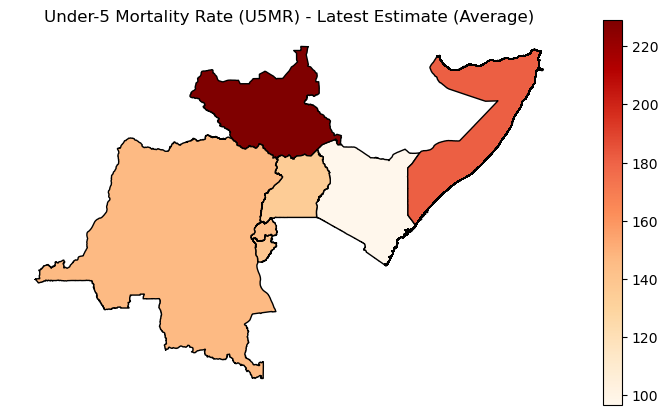

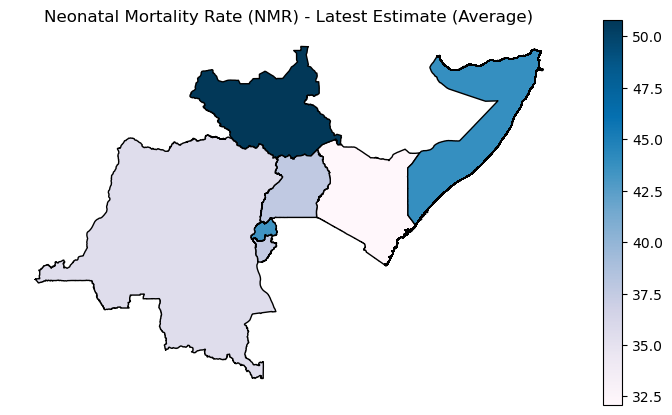

In [19]:
# Plot Under five mortality rate map
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
u5mr_map.plot(column='Observation Value', cmap='OrRd', legend=True, ax=ax, edgecolor='black')
ax.set_title('Under-5 Mortality Rate (U5MR) - Latest Estimate (Average)')
ax.axis('off')
plt.show()


# --- Prepare Neonatal Mortality Rate (NMR) data ---

nmr_data = eac_gdf_with_data[eac_gdf_with_data['Indicator'] == 'Neonatal mortality rate']

# Group by country (Location) and take mean Observation value
nmr_data_grouped = nmr_data.groupby('Geographic area', as_index=False)['Observation Value'].mean()

# Merge back with geometry
nmr_map = eac_gdf_with_data[['Geographic area', 'geometry']].drop_duplicates().merge(nmr_data_grouped, on='Geographic area', how='inner')

# Plot neonatal mortality rate map
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
nmr_map.plot(column='Observation Value', cmap='PuBu', legend=True, ax=ax, edgecolor='black')
ax.set_title('Neonatal Mortality Rate (NMR) - Latest Estimate (Average)')
ax.axis('off')
plt.show()

The darker shaded areas show high numbers of estimate for the indicator. 

From the maps, it shows that Somalia and South Sudan has the highest estimate for the Under-five mortality rate. 

In the NMR map; Somalia, Rwanda and South Sudan show the highest record of neonatal mortality rate.

###### Show the average trends in the mortality rates over time (plot the average trend line and add the points in the graphic for the country level estimates for each indicator.

In [20]:
# --- Step 1: Average multiple observations per country, year, and indicator ---
eac_avg = eac_inr_data_dropped.groupby(['Geographic area', 'Series Year', 'Indicator'], as_index=False)['Observation Value'].mean()

# --- Step 2: Pivot data to get U5MR and NMR in separate columns ---
eac_pivot = eac_avg.pivot(index=['Geographic area', 'Series Year'], columns='Indicator', values='Observation Value').reset_index()

# Rename columns for clarity
eac_pivot = eac_pivot.rename(columns={
    'Under-five mortality rate': 'U5MR_value',
    'Neonatal mortality rate': 'NMR_value'
})

In [21]:
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

C:\Users\user\AppData\Local\Temp\ipykernel_13788\947109649.py:26: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=10)  # Only show ~10 ticks on x-axis


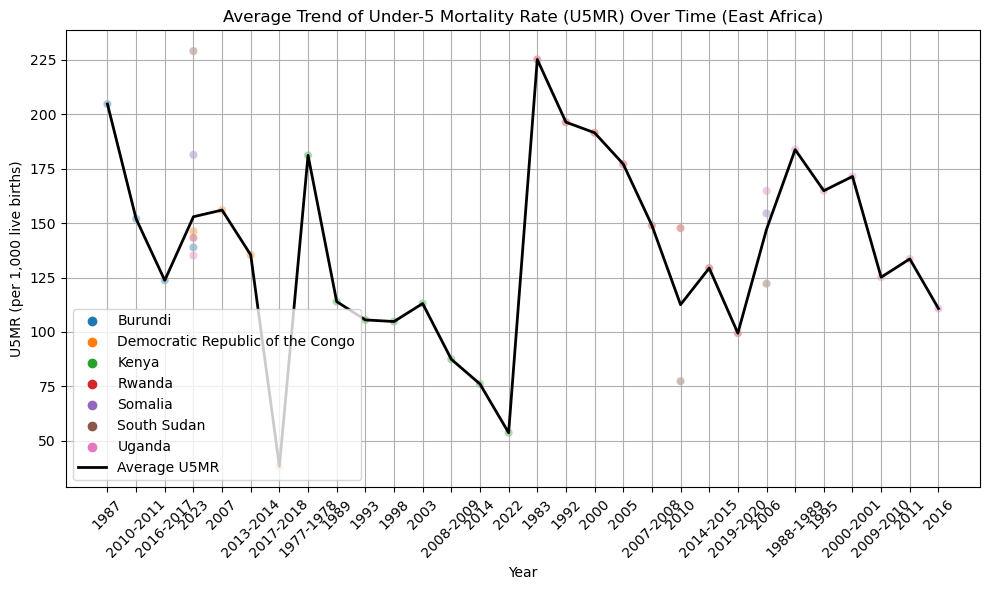

C:\Users\user\AppData\Local\Temp\ipykernel_13788\947109649.py:62: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=10)  # Only show ~10 ticks on x-axis


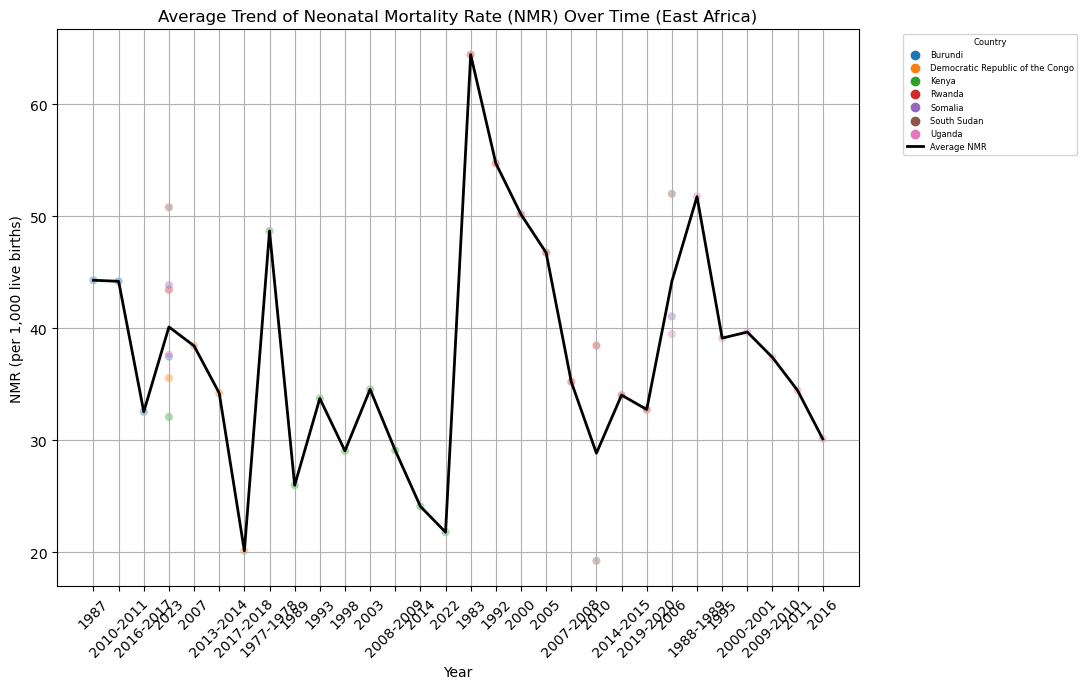

In [27]:

# --- Plot U5MR ---
plt.figure(figsize=(10,6))

# Plot individual country points
sns.scatterplot(data=eac_pivot, x='Series Year', y='U5MR_value', hue='Geographic area', alpha=0.4, legend='full')

# Plot the average trend
sns.lineplot(data=eac_pivot.groupby('Series Year')['U5MR_value'].mean().reset_index(),
             x='Series Year', y='U5MR_value', color='black', linewidth=2, label='Average U5MR')

# Enhance legend placement and styling
plt.legend(
    title='Country',
    bbox_to_anchor=(1.05, 1),  # Move legend outside plot
    loc='upper left',
    frameon=True,
    fontsize=6,
    title_fontsize=6
)
# Finalize plot
plt.title('Average Trend of Under-5 Mortality Rate (U5MR) Over Time (East Africa)')
plt.ylabel('U5MR (per 1,000 live births)')
plt.xlabel('Year')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.locator_params(axis='x', nbins=10)  # Only show ~10 ticks on x-axis
plt.legend()
plt.tight_layout()
plt.show()

#eac_pivot.replace([np.inf, -np.inf], np.nan, inplace=True) 

# Drop rows with NaN in U5MR or NMR values
eac_pivot = eac_pivot.dropna(subset=['U5MR_value', 'NMR_value'])

# --- Plot NMR ---
plt.figure(figsize=(11,7))

# Plot individual country points
sns.scatterplot(data=eac_pivot, x='Series Year', y='NMR_value', hue='Geographic area', alpha=0.4, legend='full')

# Plot the average trend
sns.lineplot(data=eac_pivot.groupby('Series Year')['NMR_value'].mean().reset_index(),
             x='Series Year', y='NMR_value', color='black', linewidth=2, label='Average NMR')

# Enhance legend placement and styling
plt.legend(
    title='Country',
    bbox_to_anchor=(1.05, 1),  # Move legend outside plot
    loc='upper left',
    frameon=True,
    fontsize=6,
    title_fontsize=6
)

# Finalize plot
plt.title('Average Trend of Neonatal Mortality Rate (NMR) Over Time (East Africa)')
plt.ylabel('NMR (per 1,000 live births)')
plt.xlabel('Year')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.locator_params(axis='x', nbins=10)  # Only show ~10 ticks on x-axis


plt.tight_layout()
plt.show()


From the Under-five mortality rates, the average trend line shows that the Democratic Republicof the Congo shows the highest rates of mortality in 1983 with 225 deaths per 1,000 live births.

For the Neonatal mortality rates, the Democratic Republic of the Congo shows highest rates of mortality rates in 1983 with approximately 67 deathes per 1,000 live births.